## House price study - ML

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.set_printoptions(precision=2)    #Prinout options

#Read the main dataset
house = pd.read_csv('../Data/house_data/kc_house_data.csv')

In [3]:
X_house = house['sqft_living']
y_house = house['price']
X_house_2d = house[['sqft_living', 'bedrooms']]
y_house_2d = house['price']

#Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_house, y_house, random_state=0)

In [4]:
X_train_shaped = X_train.values.reshape(-1, 1)
y_train_shaped = y_train.values.reshape(-1, 1)
X_test_shaped = X_test.values.reshape(-1, 1)
y_test_shaped = y_test.values.reshape(-1, 1)

## 1. Linear regression model

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_shaped, y_train_shaped)
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {}'
     .format(linreg.intercept_))
print('R-squared score (training): {}'
     .format(linreg.score(X_train_shaped, y_train_shaped)))
print('R-squared score (test): {}'
     .format(linreg.score(X_test_shaped, y_test_shaped)))

linear model coeff (w): [[280.46]]
linear model intercept (b): [-41844.29]
R-squared score (training): 0.4960150633586783
R-squared score (test): 0.48305523147872154


### Plot the linear regression model

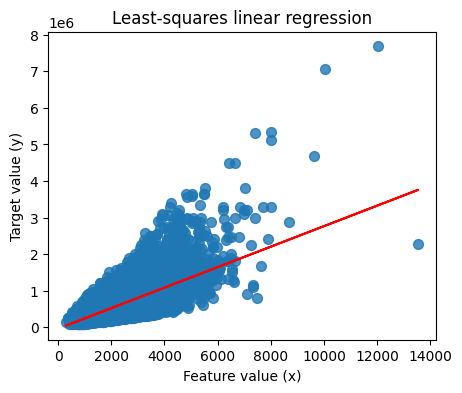

In [6]:
plt.figure(figsize=(5,4))
plt.scatter(X_train_shaped, y_train_shaped, marker= 'o', s=50, alpha=0.8)
plt.plot(X_train_shaped, linreg.coef_ * X_train_shaped + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

### Calculate RMSE

In [7]:
house['price'].mean()

540182.1587933188

In [8]:
from sklearn.metrics import mean_squared_error
house_pred = linreg.predict(X_test_shaped)
print("Coefficients: {}".format(linreg.coef_))
print("Intercept is: {}".format(linreg.intercept_))
print("Mean squared error: {}".format(mean_squared_error(y_test_shaped, house_pred, squared = False)))

Coefficients: [[280.46]]
Intercept is: [-41844.29]
Mean squared error: 262224.48626798944


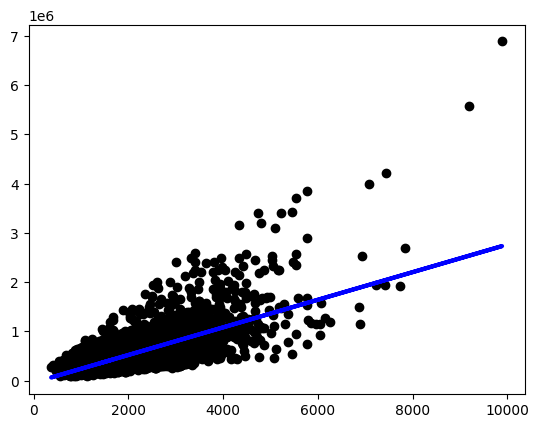

In [9]:
plt.scatter(X_test_shaped, y_test_shaped, color='black')
plt.plot(X_test_shaped, house_pred, color='blue', linewidth = 3)

### Explore multiple features now

In [10]:
my_features = ['bedrooms', 'sqft_living', 'bathrooms', 'zipcode', 'sqft_lot', 'floors']
house[my_features].head()

,bedrooms,sqft_living,bathrooms,zipcode,sqft_lot,floors
0,3,1180,1.00,98178,5650,1.0
1,3,2570,2.25,98125,7242,2.0
2,2,770,1.00,98028,10000,1.0
3,4,1960,3.00,98136,5000,1.0
4,3,1680,2.00,98074,8080,1.0


### Regression model with more features

In [11]:
y_multi_features_house = house[my_features]

In [ ]:
linreg_multi_house = LinearRegression()
linreg_multi_house.fit(X_train_shaped, y_multi_features_house)
print('linear model coeff (w): {}'
     .format(linreg_multi_house.coef_))
print('linear model intercept (b): {}'
     .format(linreg_multi_house.intercept_))
print('R-squared score (training): {}'
     .format(linreg_multi_house.score(X_train_shaped, y_multi_features_house)))
print('R-squared score (test): {}'
     .format(linreg_multi_house.score(X_test_shaped, y_multi_features_house)))